**Task 3**

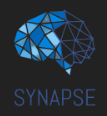

**Unsupervised Learning**

Unsupervised learning can be broken down into three main tasks:

1.   Clustering
2.   Association rules
3.   Dimensionality reduction

Let's explore these topics :))  

Clustering is an unsupervised learning technique used to group similar data points together. It's widely used in various applications like customer segmentation, anomaly detection, and more. In this task, we'll explore different clustering algorithms and visualize their results.

We will work with the Country dataset. This dataset consists of information that determine the socio-economic factors of a country - exports, imports, income, life expectancy, gdpp, etc. The main aim of this task is to find the countries which are in dire need of financial aid.

The dataset that will be used can be found here - [DATA](https://drive.google.com/drive/folders/1FMMMeniP32-G5j_s15S89z7LDlB1Xe9j?usp=drive_link)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from ipywidgets import interact
import os
import warnings
warnings.filterwarnings("ignore")

Mount your drive

In [16]:
# code here
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
# load the data
data = '/content/gdrive/MyDrive/Copy of Country-data.csv'  # Mention the path in the strings below
df = pd.read_csv(data)

# Understanding the data

In [18]:
# print 1st few rows of the dataset, its shape and the columns
print(df.head(5))
print(df.shape)
print(df.columns)

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  
(167, 10)
Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


In [19]:
# check for null values
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [20]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [21]:
# check for any duplicated values
df.duplicated().sum()

0

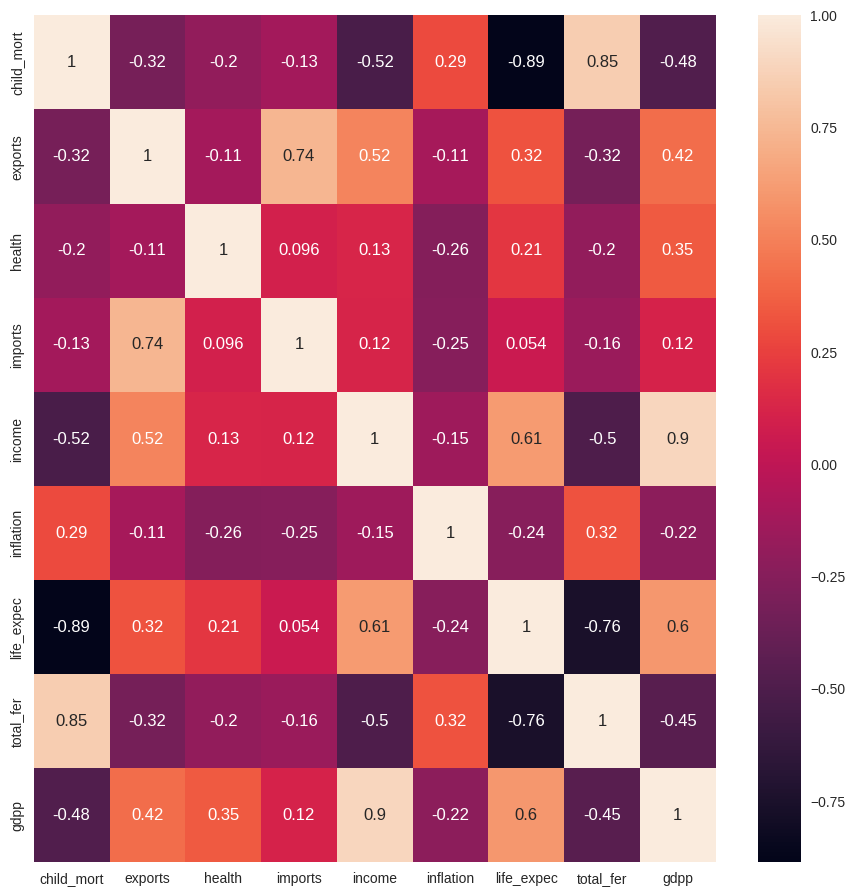

In [22]:
# displaying the correlation matrix (heatmap)
plt.figure(figsize=(11,11))
num_cols=df.select_dtypes(include=['float64','int64']).columns
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

Something really cool you can use to plot data other than Seaborn, Matplotlib, etc. is **Plotly**. Using this we can display how any feature here (import, gdpp or any of the others) varies country-wise.
And this can literally be plotted on the world map!

The official documentation- [Choropleth Maps](https://plotly.com/python/choropleth-maps/)

In [23]:
countries_map = list(df.drop('country', axis = 1))
countries_map

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [24]:
# explain what all the parameters mean here
for column in countries_map:    #this will take every column in the list made above one by one
    fig = px.choropleth(df,               #database that is to be used
                       geojson = countries_map,     #this is to get the map of the country on which we will plot the graph
                       locationmode = 'country names',    #this is to provide the country's name when hovering or selecting a particular area
                       locations = 'country',               #this is label to above locationmode
                       color = column,                        #this means that the colours will be mapped acc to values in the particular column (darker the colour more the value)
                       title = 'Country by ' + column,          #giving title to plot
                       color_continuous_scale = 'Greens')        #the colour scale is gonna be of this colour

    fig.show()

# Pre-processing the data

In [25]:
# Dropping the 'country' column for PCA and clustering
df_pca = df.drop('country', axis=1)
df_pca.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Stnadardize the data

In [26]:
# Initiate a StandardScaler object and fit it on the numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)
scaled_data=pd.DataFrame(scaled_data, columns=df_pca.columns)
print(scaled_data.head(5))
print(df_pca.head(5))

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817  
   child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   

# Dimensionality Reduction using PCA - Principal Component Analysis

Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Theory: https://towardsdatascience.com/the-mathematics-behind-principal-component-analysis-fff2d7f4b643 and https://rlrocha.medium.com/choosing-the-number-of-components-of-principal-component-analysis-36902a887520

Theory + Implementation.: https://youtu.be/OFyyWcw2cyM (Jump to timestamp - 13:50 for PCA implementaion)

Before we start of with this, **explain what PCA is and why is it necessary?**

Answer:

PCA (Principal Component Analysis) is like taking out the main or rather important components from a dataset that all in all explain the entire dataset but in a more concise way and reducing noise. It is also a partof data pre processing.

When given a large dataset having 100s of variables the analysis can be very hard and the model may face overfitting problems. PCA reduces this number of variables only keeping the ones relevant and ones that can describe the dataset without any other help.

This can be related to how that one topper friend takes out all the information from the textbook that we can get asked in the exams and which really matters to us.

Similarly, what PCA does is to keep the information which will explain the full dataset to the model and also rid it of the task to read the entire model and draw conclusions from it. It is necessary for giving a much better analysis. Also by using PCA we prevent the algorithm or model from overfitting problems.

Like how your might stop processing information after the second page of the textbook but we dont want our model to do that, hence PCA.

ref - https://www.keboola.com/blog/pca-machine-learning#:~:text=High%2Ddimensional%20data%20causes%20regression,the%20predictive%20algorithms%20from%20overfitting.


Reduce the number of dimensions using PCA,

Hints:
1. Initialise instance of PCA and set *n_components* to 0.9 and *random_state* to 20.
2. Fit data_scaled over the PCA instance created
3. Transform data_scaled over the fitted PCA instance and store it in a variable named data_pca.

In [27]:
# code here
pca = PCA(n_components=0.9, random_state=20)        #the 0.9 tells pca to take those components that capture 90% of the variance
data_pca = pca.fit_transform(scaled_data)
data_pca

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00, -1.58310044e-01],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00,  1.74677321e-01],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01,  1.56474647e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01, -2.73208934e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01, -1.93006961e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02,  9.81056507e-01],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00, -5.59924282e-02],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00, -7.31192330e-01],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00,  8.35797058e-02],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01

Let's check the shape of data_pca

In [28]:
# code here
data_pca.shape
# Should print (167, 5) if everything is correct.


(167, 5)

Go through these and display the explained_variance_ratio_ and plot the same

Ref: https://saturncloud.io/blog/what-is-sklearn-pca-explained-variance-and-explained-variance-ratio-difference/ and https://www.jcchouinard.com/pca-explained-variance/

In [29]:
# explained variance
print("   Explained Variance =   ", pca.explained_variance_)
print("Explained Variance Ratio =", pca.explained_variance_ratio_)

   Explained Variance =    [4.16057017 1.55566165 1.1774338  1.00077724 0.66459866]
Explained Variance Ratio = [0.4595174  0.17181626 0.13004259 0.11053162 0.07340211]


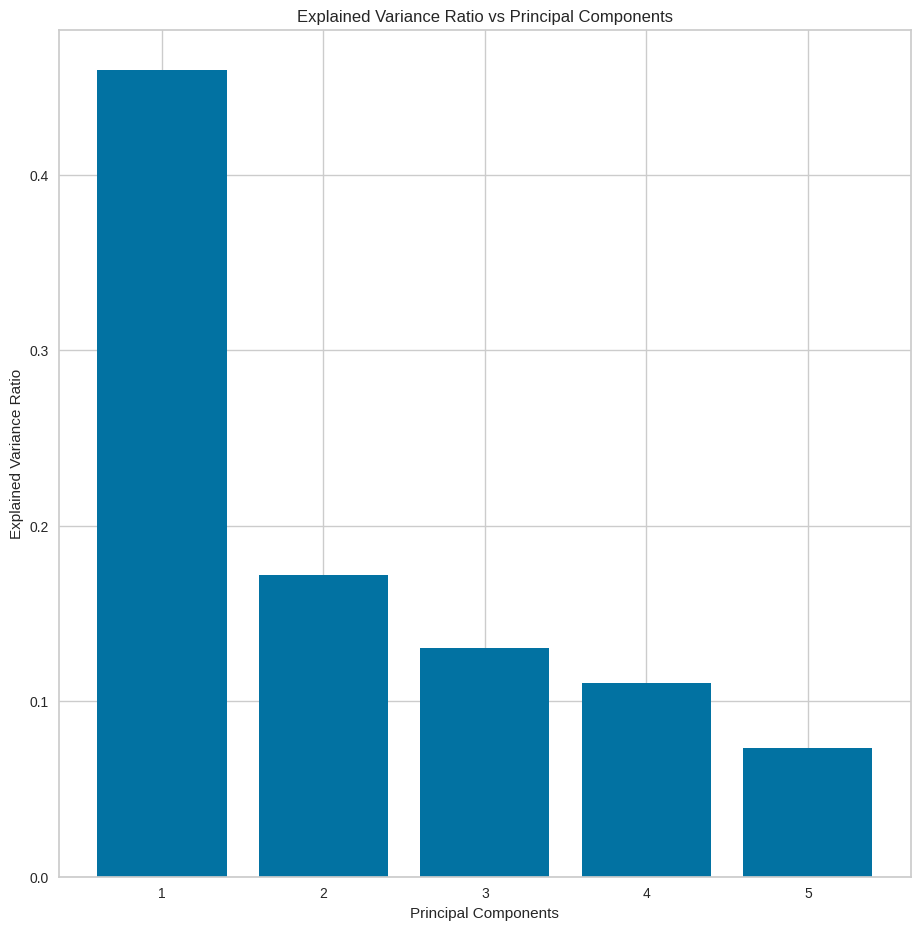

In [30]:
# Plotting the explained variance
ev_plot = pca.explained_variance_ratio_
plt.figure(figsize=(11,11))
plt.bar(range(1, len(ev_plot)+1),ev_plot)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1,len(ev_plot)+1))
plt.title("Explained Variance Ratio vs Principal Components")
plt.show()

What do you understand from this?

Answer:

Let's start from PCA dataset making

So we had our scaled data that had been fitted and transformed. We take that data and run it through the PCA algorithm which gave us the values for our data_pca all fitted and transformed

The values in dataset now have been derived from matrix calculation between the eigen vector we got from eigen values(that were arranged in descending order) and the original value - mean matrix.

ref - https://www.analyticsvidhya.com/blog/2022/07/principal-component-analysis-beginner-friendly/

from these principal components we got the ones that explained atleast 90% of the variance of original dataset (n_components=0.9)

then we got explained_variance that is how much variance is explained by each principal component along with its ratio (a particular explained variance / total explained variance)

and then we plotted a graph showing how much our dataset now depends on a particular principal component. and we found out that majority of the dataset is explained 1st principal, the next three explaining almost equally and the last one the least.

# K-Means Clustering (Partition-Based Clustering)

K-means clustering is an essential partitioning algorithm used to categorize a dataset into 'k' distinct, non-overlapping clusters. Each data point is assigned to the cluster with the nearest mean or centroid, symbolizing the cluster's center. The primary goal of the algorithm is to minimize the sum of squared distances between data points and their respective cluster centroids.

For an in-depth exploration of K-means clustering, you can refer to this comprehensive article on Analytics Vidhya: [Comprehensive Guide to K-means Clustering](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/).

For a deeper understanding of the mathematical underpinnings of K-means clustering, Wikipedia is a valuable resource. You can explore the Wikipedia page on K-means clustering for a detailed description: [K-means Clustering Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering). This will help you grasp the mathematical intricacies of the algorithm and its applications in machine learning.

**2 Dimensional Visualization**

In [31]:
## Perform K-Means clustering with interactive widget - give it a second to load, when you change the no. of clusters
def kmeans_clustering(num_clusters):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_pca)

    plt.figure(figsize=(11, 11))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.title('K-Means Clustering')
    plt.legend()
    plt.show()

low = 1
high = 5
scale = 1
interact(kmeans_clustering, num_clusters=(low, high, scale))

interactive(children=(IntSlider(value=3, description='num_clusters', max=5, min=1), Output()), _dom_classes=('…

<function __main__.kmeans_clustering(num_clusters)>

**3 Dimensional Visualization**

In [32]:
def kmeans_3d_clustering(num_clusters):
    kmeans_3d = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_3d_labels = kmeans_3d.fit_predict(data_pca)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=kmeans_3d_labels, cmap='viridis', edgecolors='k')
    ax.set_xlabel('Feature 1 (Standardized)')
    ax.set_ylabel('Feature 2 (Standardized)')
    ax.set_zlabel('Feature 3 (Standardized)')
    ax.set_title('Kmeans Clustering (3D)')
    plt.show()

interact(kmeans_3d_clustering, num_clusters=(1, 6, 1))

interactive(children=(IntSlider(value=3, description='num_clusters', max=6, min=1), Output()), _dom_classes=('…

<function __main__.kmeans_3d_clustering(num_clusters)>

# Elbow Point

The "elbow point" is a concept often used in the context of K-means clustering to help determine the optimal number of clusters (k) for a given dataset. It is a graphical method that can assist data analysts and machine learning practitioners in finding an appropriate value for k when applying K-means clustering.

The rationale behind the elbow point method is that as you increase the number of clusters (k), the sum of squared distances will generally decrease because data points will be closer to their respective cluster centroids. However, beyond a certain point, subdividing the data into more clusters doesn't provide significant improvements in reducing the sum of squared distances. The elbow point represents that optimal trade-off between the number of clusters and the compactness of each cluster.

It's important to note that the elbow point method is a heuristic and not a foolproof method for determining the ideal k value. In some cases, the elbow point may not be very pronounced, making it challenging to choose the best k. Additionally, the choice of k should also consider domain knowledge and the specific goals of your analysis.


Elbow Method to determine the number of clusters to be formed:


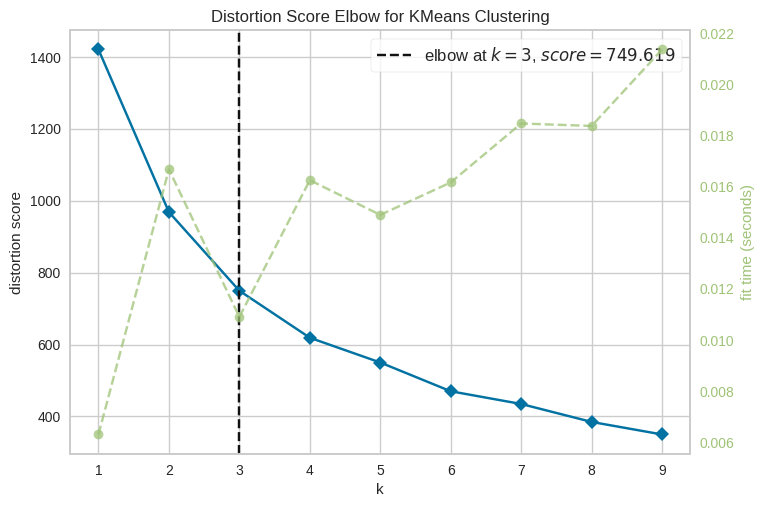

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
print('Elbow Method to determine the number of clusters to be formed:')

Elbow_M = KElbowVisualizer(KMeans(), k=(1, 10))
Elbow_M.fit(data_pca)
Elbow_M.show()

# Agglomerative Clustering

It is a hierarchical clustering algorithm used in unsupervised machine learning and data analysis. It is a "bottom-up" or "agglomerative" approach to clustering, where individual data points are initially treated as their own clusters and then progressively merged into larger clusters based on a similarity or distance metric. The result is a tree-like structure called a dendrogram that represents the hierarchical relationships between clusters.

As always, You can find more detailed information about hierarchical clustering, including agglomerative clustering, in the Wikipedia article on "Hierarchical clustering" at the following link: [Hierarchical Clustering Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering). This is the best resource for hierarchical clustering and it is advisable to go through it twice if possible! :)

More ref: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/

**2 Dimensional Visualization**

In [34]:
# Perform Agglomerative clustering with interactive widget
def agglomerative_clustering(num_clusters):
  agglomerative = AgglomerativeClustering(n_clusters=num_clusters)
  agglomerative_labels = agglomerative.fit_predict(scaled_data)

  plt.figure(figsize=(11, 11))
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=agglomerative_labels, cmap='viridis', edgecolors='k')
  plt.xlabel('Feature 1 (Standardized)')
  plt.ylabel('Feature 2 (Standardized)')
  plt.title('Agglomerative Clustering')
  plt.legend()
  plt.show()

interact(agglomerative_clustering, num_clusters=(1,6,1))

interactive(children=(IntSlider(value=3, description='num_clusters', max=6, min=1), Output()), _dom_classes=('…

<function __main__.agglomerative_clustering(num_clusters)>

Similar to classification and regression metrics, we have some [clustering metrics](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics) to evaluate performance.

We wll explore one of them: [silhouette_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

In [47]:
agglo = AgglomerativeClustering(n_clusters=3, linkage='average')
labels = agglo.fit_predict(scaled_data)
silhouette = silhouette_score(scaled_data, labels)
silhouette

0.5620472870560562

Look into any 2 other metrics and give a brief explanation.

Do that here :)

As we know silhoutte score tells us how many clusters are good for a given dataset

There is Davies-Boulding Index that tells us the quality of our clusters while also figuring out ideal number of clusters. In this a lower number means a well defined cluster. It also helps to choose the best clustering solutions for any datasets by offering a numerical assessment of the clustering quality.

Then there's Calinski-Harabasz Index (Variance Ratio Criterion). This is also used to evaluate the quality of clusters within a dataset. Higher values indicate compact and well-separated clusters. It also helps determine the ideal number of clusters for a given dataset. This is useful for checking how well a clustering algorithms is working.

ref - https://www.geeksforgeeks.org/clustering-metrics/


**3 Dimensional Visualization**

In [36]:
# Perform Agglomerative clustering with interactive widget
def agglomerative_3d_clustering(num_clusters):
  agglomerative_3d = AgglomerativeClustering(n_clusters=num_clusters)
  agglomerative_3d_labels = agglomerative_3d.fit_predict(data_pca) # write code here

  #plot
  fig = plt.figure(figsize=(20, 20))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=agglomerative_3d_labels, cmap='viridis', edgecolors='k')
  ax.set_xlabel('Feature 1 (Standardized)')
  ax.set_ylabel('Feature 2 (Standardized)')
  ax.set_zlabel('Feature 3 (Standardized)')
  ax.set_title('Agglomerative Clustering')
  plt.show()

interact(agglomerative_3d_clustering, num_clusters=(1, 6, 1)) # fill here

interactive(children=(IntSlider(value=3, description='num_clusters', max=6, min=1), Output()), _dom_classes=('…

<function __main__.agglomerative_3d_clustering(num_clusters)>

Look into what dendrograms are and plot them here.

Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

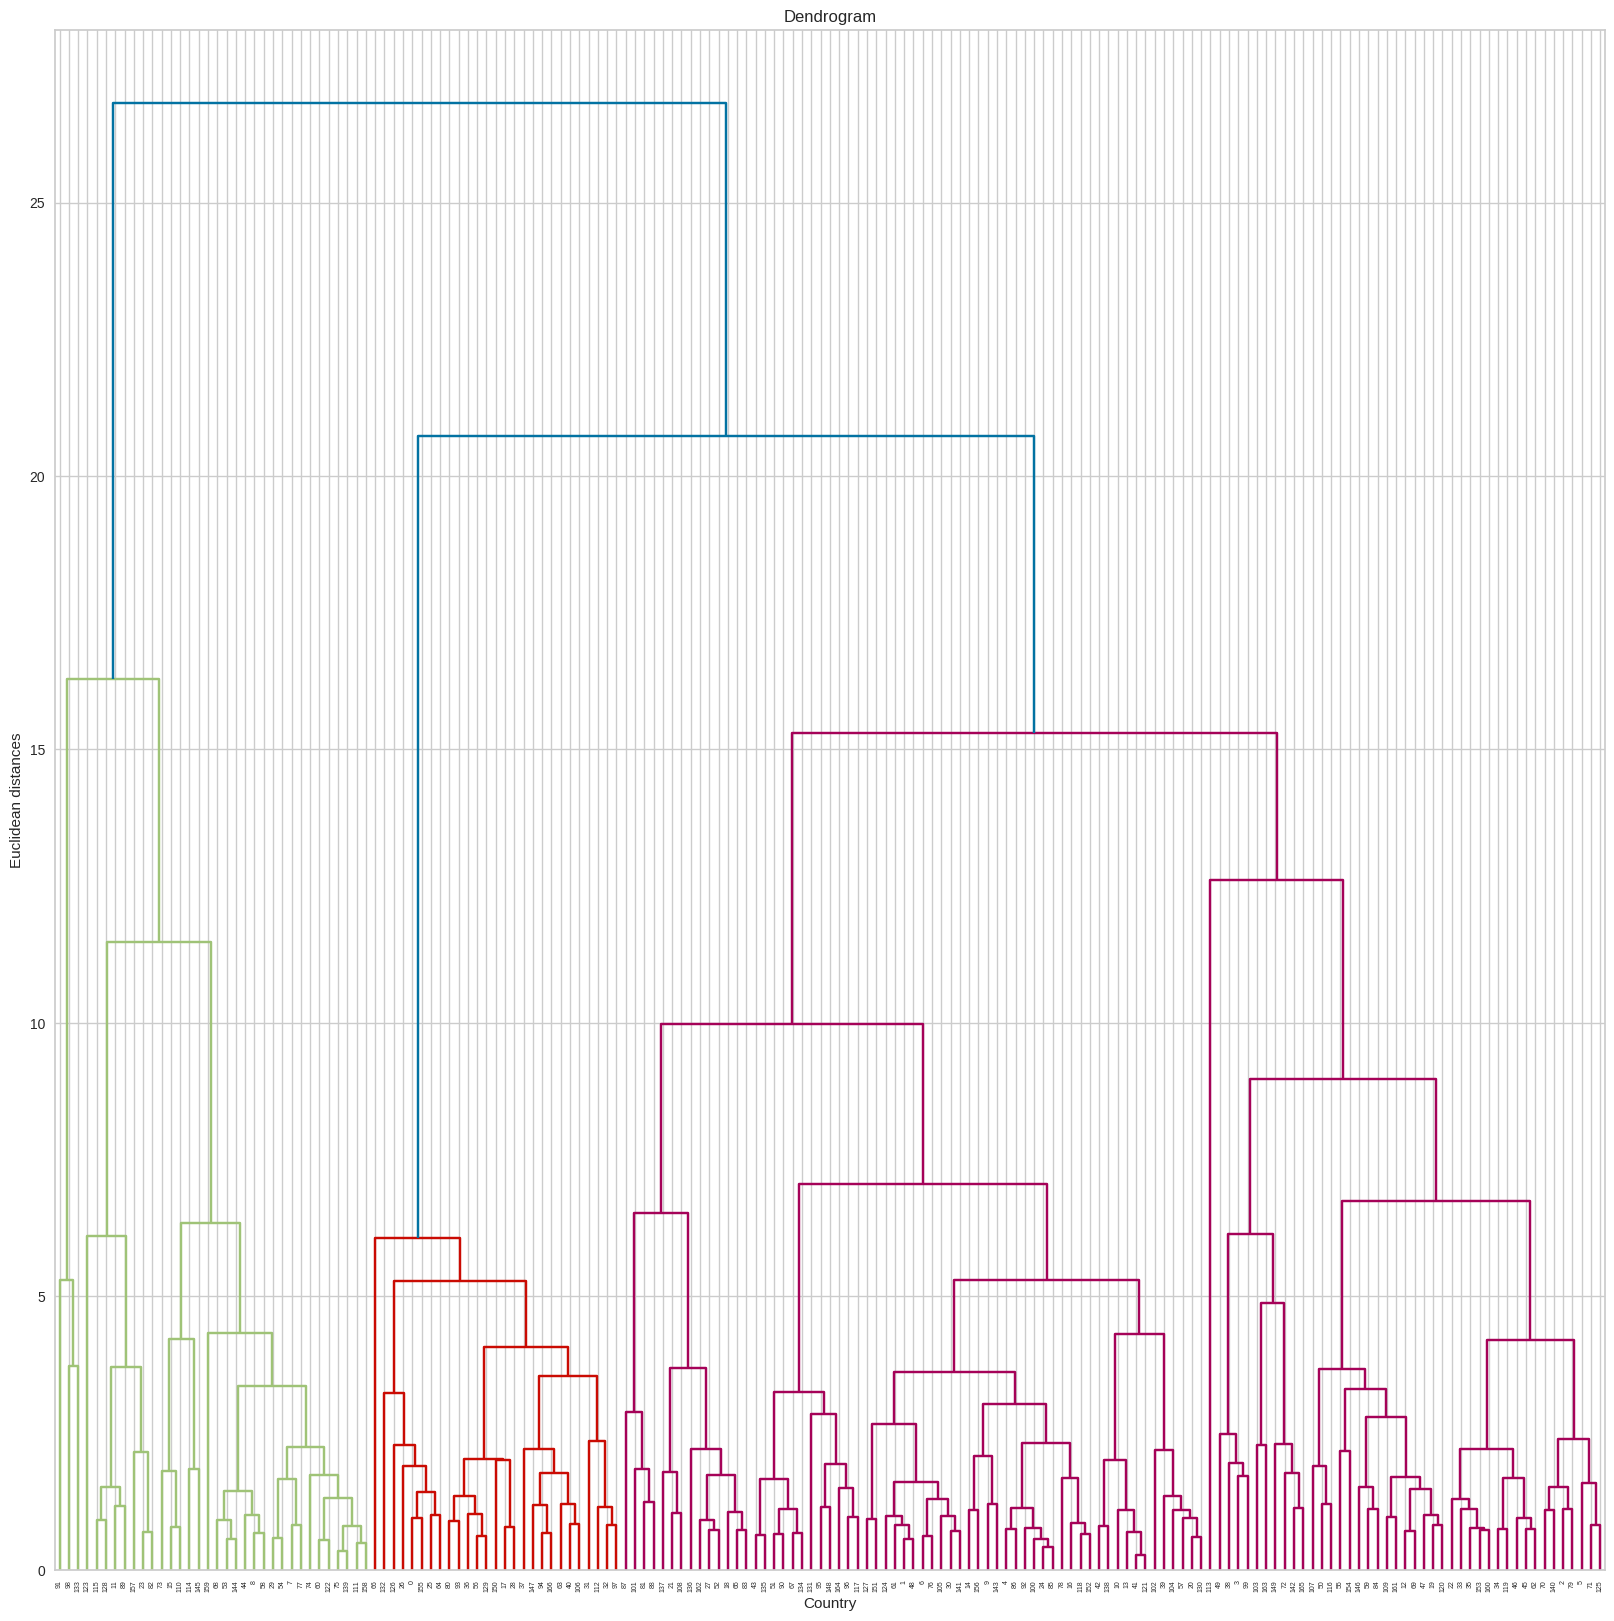

In [37]:
# code here
plt.figure(figsize=(20,20))
sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.xlabel("Country")
plt.ylabel("Euclidean distances")
plt.title("Dendrogram")
plt.show()

# DBSCAN Clustering

DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is a popular density-based clustering algorithm in unsupervised machine learning. It is particularly useful for discovering clusters of arbitrary shapes in datasets with varying levels of data density. DBSCAN is known for its ability to handle noise and outliers effectively.

As always, You can find additional information about how DBSCAN clustering works in the following article on Analytics Vidhya:

[How DBSCAN Clustering Works](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/#:~:text=DBSCAN%20is%20a%20density%2Dbased,points%20into%20a%20single%20cluster.)

This article provides a detailed explanation of DBSCAN, including its underlying concepts, the role of epsilon (ε) and minimum points (MinPts), and practical examples of how to use DBSCAN for clustering. It's a valuable resource for gaining a deeper understanding of the algorithm with Wikipedia as the side resource.

**2 Dimensional Visualization**

In [38]:
# Perform DBSCAN clustering with interactive widget
def dbscan_clustering(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(scaled_data)


    # plot it
    plt.figure(figsize=(11, 11))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolors='k')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.title('DBSCAN Clustering')
    plt.show()

interact(dbscan_clustering, eps=(1,6,1), min_samples=(1,6,1))  # enter values here

interactive(children=(IntSlider(value=3, description='eps', max=6, min=1), IntSlider(value=3, description='min…

<function __main__.dbscan_clustering(eps, min_samples)>

**3 Dimensional Visualization**

In [39]:
# Perform DBSCAN clustering with interactive widget
def dbscan_3d_clustering(eps, min_samples):
  dbscan_3d = DBSCAN(eps=eps, min_samples=min_samples)
  dbscan_3d_labels = dbscan_3d.fit_predict(data_pca) # write code here

  #plot
  fig = plt.figure(figsize=(20, 20))
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=dbscan_3d_labels, cmap='viridis', edgecolors='k')
  ax.set_xlabel('Feature 1 (Standardized)')
  ax.set_ylabel('Feature 2 (Standardized)')
  ax.set_zlabel('Feature 3 (Standardized)')
  ax.set_title('Agglomerative Clustering')
  plt.show()

interact(dbscan_3d_clustering, eps=( 1, 6, 1), min_samples=(1, 6, 1))

interactive(children=(IntSlider(value=3, description='eps', max=6, min=1), IntSlider(value=3, description='min…

<function __main__.dbscan_3d_clustering(eps, min_samples)>

# Mean Shift Clustering

It is a density-based clustering algorithm used in unsupervised machine learning and data analysis. Similar to DBSCAN, Mean Shift is capable of discovering clusters with arbitrary shapes and sizes in a dataset. It is particularly useful for applications where the number of clusters is not known in advance and when clusters have varying densities.

For more hands-on information about the Mean Shift clustering algorithm, you can refer to this tutorial on Analytics India Magazine:

[Hands-On Tutorial on Mean Shift Clustering Algorithm](https://analyticsindiamag.com/hands-on-tutorial-on-mean-shift-clustering-algorithm/)

This tutorial provides practical insights into how to implement and use Mean Shift clustering, making it a valuable resource for those looking to apply this clustering technique to real-world data analysis and machine learning tasks especially in the sector of Image Segmentation.

**2 Dimensional Visualization**

In [40]:
# Perform Mean Shift clustering with interactive widget
def meanshift_clustering(n_band):
    mean_shift = MeanShift(bandwidth=n_band)
    mean_shift_labels = mean_shift.fit_predict(scaled_data)
    # code here

    #plot here
    plt.figure(figsize=(11, 11))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=mean_shift_labels, cmap='viridis', edgecolors='k')
    plt.xlabel('Feature 1 (Standardized)')
    plt.ylabel('Feature 2 (Standardized)')
    plt.title('Mean Shift Clustering')
    plt.show()
interact(meanshift_clustering, n_band=(1, 6, 1)) # enter here

interactive(children=(IntSlider(value=3, description='n_band', max=6, min=1), Output()), _dom_classes=('widget…

<function __main__.meanshift_clustering(n_band)>

***Congratulations! You have explored various clustering algorithms. Each algorithm has its own advantages and use cases. Remember, choosing the right algorithm and the right number of clusters is crucial. Feel free to experiment with different datasets and parameters to gain a better understanding.***

# **Bonus: To be done only if you have completed the above tasks.**

In this task, we covered clustering and Dimensionality reduction. But still, one aspect of Unsupervised Learning is left to be covered- **Association rules**. Reseach about this topic and mention the different algos that exist.

 Also, look into the functioning of **Spectral Clustering algorithm** and mention it here :)

 The best reseach will be edited and featured on the Synapse Instagram page!!

Association rules is when the algorithm tries to learn and discover interesting relationship and patterns hidden in large datasets.

They are generally used for finding patterns that frequently occur in a dataset. Mind you that Association rules is not a predictive method but rather a descriptive one, which can recommend stuff.
Kind of like the suggestions given to you by your netflix account based on what you have watched. (if this then that scenario)

There are three types of algorithm that we can use-

Apriori - This algorithm uses frequent datasets to generate association rules. It is designed to work on the databases that contain transactions and uses breadth-first (shortest path using the Queue data structure, is slower than depth-first) and Hash tree to get itemsets.

It is mainly used for market basket analysis and helps to understand the products that can be bought together. It can also be used in the healthcare field to find drug reactions for patients.

Eclat - Equivalence Class Transformation algorithm uses a depth-first search (use of the Stack data structure) to find frequent itemsets in a transaction database. It performs faster execution than Apriori Algorithm.

F-P Growth Algorithm - Frequent Pattern algorithm is the improved version of the Apriori Algorithm. It represents the database in the form of a tree structure known as frequent pattern or tree. The purpose of this frequent tree is to extract the most frequent patterns.

**Working - Association rules work on the basis of If-Else statements**

Here the If element is called antecedent(what has happened), and then statement is called as Consequent(what might happen).

Now if we got two items only then finding out the association between them is easy and it will be called single cardinality. However the difficulty comes when there are 100s of items and we have to find association between them. Here we use these metrics-

Support - it is the frequency of two itemsets occuring together out of the entire data

Confidence - it shows how often a rule has been found to be true. Or how often the two items (suppose X and Y) occur together in the dataset when the occurrence of X is already given.

Mathematically- it is the ratio of the transaction that contains X and Y to the number of records that contain X.

Lift (Important) -It is the strength of the rule. It tells us that out of the number of times two items x & y have occured together how many times is it more than expected if they independent of each other(more than just a coincidence case).





ref -
https://medium.com/@manilwagle/association-rules-unsupervised-learning-in-retail-69791aef99a#:~:text=Introduction%20to%20Association%20Rules,relationship%20hidden%20in%20large%20datasets.

https://javatpoint.com/association-rule-learning



Now for Spectral Clustering algorithm

Imp - Unlike algorithms like K-Means, spectral clustering is particularly effective in dealing with complex and non-convex data structures.

1. Data Points are treated as nodes of a graph, the connections between nodes represent their pairwise similarity or affinity.
2. These nodes are then mapped on a lower dimensional graph using the affinity aspect such that clusters can be formed from them
3. Spectral Clustering only helps in clustering data and the compact aspect of the cluster is not necessary here.
4. When making clusters, points that are connected or immediately next to each other are put in the same cluster. Even if the distance between 2 points is less, if they are not connected, they are not clustered together.

Fun Fact - If we use Eucledean Distance in Spectral Clustering's similarity matrix, It will behave like k-means. The vice-versa isn't true.

Working -
1. Firstly the graph with data point as nodes is formed using their pairwise affinity to each other.
2. Unnormalized Laplacian and Normalized Laplacian matrices are used to capture characteristic aspects of the underlying graph.
3. Then the eigen values and vectors are calculated.

Note - The eigenvectors having smaller eigenvalues often contain valuable insights regarding the structure of clusters to be formed.
4. Dimensions are then reduced for better efficiency and the eigen vectors are taken as coordinates to be plotted on a higher dimension graph.
5. Clusters are then assigned. However over here the use of K-Means or Hierarchial may give us well defined clusters (one thing that might not be guaranteed in spectral clustering)


ref -
https://www.kaggle.com/code/vipulgandhi/spectral-clustering-detailed-explanation

https://www.geeksforgeeks.org/spectral-clustering-a-comprehensive-guide-for-beginners/


# **End of Task**

> ©DJS Synapse 2024 - 2025